<a href="https://colab.research.google.com/github/satishchaudhary382/awesome-machine-learning/blob/master/Introduction%20to%20Customer%20Segemetation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt

In [0]:
df = pd.read_excel("Online Retail.xlsx")

In [0]:
def get_month(x):
  return dt.datetime(x.year, x.month, 1)

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12-01
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01


In [0]:
grouping = df.groupby("CustomerID")['InvoiceMonth']

In [0]:
df['CohortMonth'] = grouping.transform('min')

In [0]:
def get_date_int(df, column):
  year = df[column].dt.year
  month = df[column].dt.month
  day = df[column].dt.day
  return year, month, day

In [0]:
invoice_year, invoice_month,_ = get_date_int(df, 'InvoiceMonth')
cohort_year, cohort_month,_ = get_date_int(df, 'CohortMonth')

In [0]:
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

In [0]:
df['CohortIndex'] = year_diff*12+month_diff+1
df

In [58]:
cohort_data = df.groupby(['CohortMonth','CohortIndex'])['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_data

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1.0,871
1,2010-12-01,2.0,322
2,2010-12-01,3.0,291
3,2010-12-01,4.0,329
4,2010-12-01,5.0,308
5,2010-12-01,6.0,345
6,2010-12-01,7.0,327
7,2010-12-01,8.0,304
8,2010-12-01,9.0,306
9,2010-12-01,10.0,346


In [0]:
cohort_counts = cohort_data.pivot(index= 'CohortMonth',
                                 columns = 'CohortIndex',
                                 values = 'CustomerID')

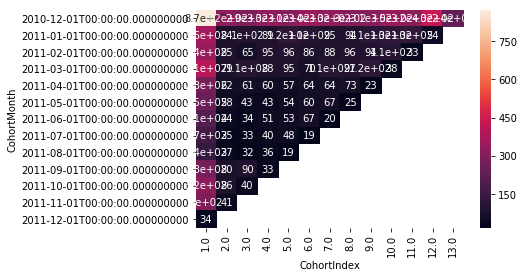

In [57]:
import seaborn as sns
sns.heatmap(cohort_counts, annot = True)